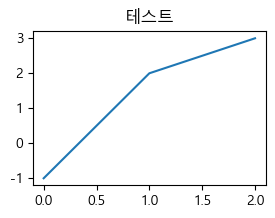

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

pd.Series([-1,2,3]).plot(title='테스트', figsize=(3,2))
pass


## 데이터 준비

#### 문제정의

> * 많이 발생하는 교통사고 유형은?
> * 사망자, 중상자수가 많은 교통사고 유형은?
> * 사망률, 중상률이 높은 교통사고 유형은??

#### 데이터 수집
https://www.data.go.kr/data/15070282/fileData.do

#### 데이터프레임 생성

In [102]:
# -----------------------------------------
# 데이터프레임 생성
# -----------------------------------------

data_file = 'data/한국도로교통공단_사고유형별 교통사고 통계_20231231.csv'
df = pd.read_csv(data_file, encoding='cp949')

#### 데이터 확인

In [103]:
# -----------------------------------------
# 데이터프레임 전체 확인
# -----------------------------------------

df

,사고유형대분류,사고유형중분류,사고유형,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,차대사람,횡단중,횡단중,13081,419,5868,6999,664
1,차대사람,차도통행중,차도통행중,4507,135,1704,2491,355
2,차대사람,길가장자리구역통행중,길가장자리구역통행중,1985,28,544,1303,190
3,차대사람,보도통행중,보도통행중,2632,24,849,1735,206
4,차대사람,기타,기타,14791,253,4778,9111,1466
5,차대차,정면충돌,정면충돌,7899,162,3498,8781,612
6,차대차,측면충돌,측면충돌,65621,317,15386,77040,5983
7,차대차,후진중충돌,후진중충돌,4017,3,301,4724,254
8,차대차,추돌,추돌,31939,325,7197,46557,3300
9,차대차,기타,기타,43459,234,9735,48179,4740


In [104]:
# -----------------------------------------
# info()
# -----------------------------------------

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   사고유형대분류  18 non-null     object
 1   사고유형중분류  18 non-null     object
 2   사고유형     18 non-null     object
 3   사고건수     18 non-null     int64 
 4   사망자수     18 non-null     int64 
 5   중상자수     18 non-null     int64 
 6   경상자수     18 non-null     int64 
 7   부상신고자수   18 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 1.3+ KB


In [105]:
# -----------------------------------------
# shape
# -----------------------------------------

df.shape

(18, 8)

#### 인덱스 설정


In [106]:
df

,사고유형대분류,사고유형중분류,사고유형,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,차대사람,횡단중,횡단중,13081,419,5868,6999,664
1,차대사람,차도통행중,차도통행중,4507,135,1704,2491,355
2,차대사람,길가장자리구역통행중,길가장자리구역통행중,1985,28,544,1303,190
3,차대사람,보도통행중,보도통행중,2632,24,849,1735,206
4,차대사람,기타,기타,14791,253,4778,9111,1466
5,차대차,정면충돌,정면충돌,7899,162,3498,8781,612
6,차대차,측면충돌,측면충돌,65621,317,15386,77040,5983
7,차대차,후진중충돌,후진중충돌,4017,3,301,4724,254
8,차대차,추돌,추돌,31939,325,7197,46557,3300
9,차대차,기타,기타,43459,234,9735,48179,4740


In [107]:
# -----------------------------------------
# 중첩인덱스 설정
#  - ['사고유형대분류', '사고유형']
# -----------------------------------------

df = df.set_index(['사고유형대분류', '사고유형'])


In [108]:
# -----------------------------------------
# 인덱스 확인
# -----------------------------------------

df.index

MultiIndex([( '차대사람',        '횡단중'),
            ( '차대사람',      '차도통행중'),
            ( '차대사람', '길가장자리구역통행중'),
            ( '차대사람',      '보도통행중'),
            ( '차대사람',         '기타'),
            (  '차대차',       '정면충돌'),
            (  '차대차',       '측면충돌'),
            (  '차대차',      '후진중충돌'),
            (  '차대차',         '추돌'),
            (  '차대차',         '기타'),
            ( '차량단독',         '전도'),
            ( '차량단독',         '전복'),
            ( '차량단독',      '공작물충돌'),
            ( '차량단독',  '주/정차차량 충돌'),
            ( '차량단독',    '도로이탈 추락'),
            ( '차량단독',    '도로이탈 기타'),
            ( '차량단독',         '기타'),
            ('철길건널목',      '철길건널목')],
           names=['사고유형대분류', '사고유형'])

#### 컬럼 삭제

In [109]:
# -----------------------------------------
# 사고유형중분류 컬럼 삭제
# -----------------------------------------

df = df.drop('사고유형중분류', axis=1)
df

사고건수  사망자수   중상자수   경상자수  부상신고자수
사고유형대분류 사고유형                                         
차대사람    횡단중         13081   419   5868   6999     664
        차도통행중        4507   135   1704   2491     355
        길가장자리구역통행중   1985    28    544   1303     190
        보도통행중        2632    24    849   1735     206
        기타          14791   253   4778   9111    1466
차대차     정면충돌         7899   162   3498   8781     612
        측면충돌        65621   317  15386  77040    5983
        후진중충돌        4017     3    301   4724     254
        추돌          31939   325   7197  46557    3300
        기타          43459   234   9735  48179    4740
차량단독    전도            895    83    329    395     185
        전복            130    18     48     71      20
        공작물충돌        2809   307   1163   1619     587
        주/정차차량 충돌      23     1     10      7       8
        도로이탈 추락       323    86    182    112      40
        도로이탈 기타       157    21     67     67      39
        기타           4026   134   1330   2377     592
철길건널목   철길건널목           2     1      0      1       0

## 분석

#### 사고 유형별 사고건수

In [122]:
# -----------------------------------------
# 사고건수가 많은 순서로 정렬
# -----------------------------------------

df_sorted = df.sort_values(by='사고건수')

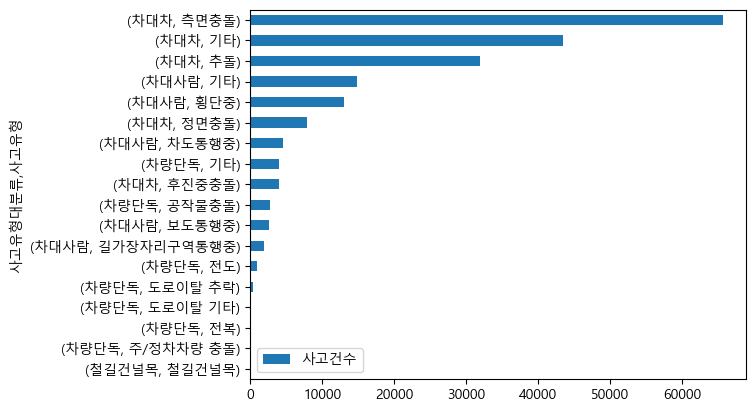

In [123]:
# -----------------------------------------
# 사고건수가 많은 순서로 정렬하여 시각화
# -----------------------------------------

df_sorted.plot(kind='barh', y='사고건수');

#### 사고 유형별 사망자수

In [22]:
# -----------------------------------------
# 사망자수가 많은 순서로 정렬
# -----------------------------------------



In [23]:
# -----------------------------------------
# 사망자수가 많은 순서로 정렬하여 시각화
# -----------------------------------------




#### 사고 유형별 중상자수

In [24]:
# -----------------------------------------
# 중상자수가 많은 순서로 정렬
# -----------------------------------------



In [25]:
# -----------------------------------------
# 중상자수가 많은 순서로 정렬하여 시각화
# -----------------------------------------



#### 사고 유형별 사망률

In [26]:
# -----------------------------------------
# 파생컬럼 추거
# -----------------------------------------



In [27]:
# -----------------------------------------
# 사망률 높은 순으로 정렬
# -----------------------------------------



In [28]:
# -----------------------------------------
# 사망률 높은 순으로 정렬하여 시각화
# -----------------------------------------


#### 사고 유형별 중상률

In [29]:
# -----------------------------------------
# 파생컬럼 추가
# -----------------------------------------



In [30]:
# -----------------------------------------
# 중상률 높은 순으로 정렬하여 시각화
# -----------------------------------------



In [31]:
# -----------------------------------------
# 중상률 높은 순으로 정렬하여 시각화
# -----------------------------------------



## 결론 도출
* 산출물 업로드
    * 시각화 결과 캡처
    * 분석결과 정리 